In [89]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [90]:
df = pd.read_csv('sales_full_data.csv') # Reading the csv file
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04-07-19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04-12-19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04-12-19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [91]:
df.isnull().sum()   #taking note of the Nan values in the csv file

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [92]:
df1 = df.dropna()   # droping off the Nan values
df1.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04-07-19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04-12-19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04-12-19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [93]:
df1.shape   #keeping an eye on the shape

(186305, 6)

In [94]:
def timer(df):
    if df.split(' ')[-1].split(':')[0] != '1' :
        
        if df.split(' ')[-1].split(':')[0] != 'Date':
            return str(int(df.split(' ')[-1].split(':')[0]) ) + '-' + str(int(df.split(' ')[-1].split(':')[0]) +1)
    else:
        return '1 - 2'

df1['Time'] = df1['Order Date'].apply(timer)    # Using the Dates to get the time 
df2 = df1.dropna()
df2.head()

D:\Users\Ridham Suhagiya\AppData\Local\Programs\Python\Python37-32\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Time
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",8-9
2,176559,Bose SoundSport Headphones,1,99.99,04-07-19 22:30,"682 Chestnut St, Boston, MA 02215",22-23
3,176560,Google Phone,1,600,04-12-19 14:38,"669 Spruce St, Los Angeles, CA 90001",14-15
4,176560,Wired Headphones,1,11.99,04-12-19 14:38,"669 Spruce St, Los Angeles, CA 90001",14-15
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",9-10


In [95]:
df2.Product.unique()

array(['USB-C Charging Cable', 'Bose SoundSport Headphones',
       'Google Phone', 'Wired Headphones', 'Macbook Pro Laptop',
       'Lightning Charging Cable', '27in 4K Gaming Monitor',
       'AA Batteries (4-pack)', 'Apple Airpods Headphones',
       'AAA Batteries (4-pack)', 'iPhone', 'Flatscreen TV',
       '27in FHD Monitor', '20in Monitor', 'LG Dryer', 'ThinkPad Laptop',
       'Vareebadd Phone', 'LG Washing Machine', '34in Ultrawide Monitor'],
      dtype=object)

In [96]:
df2['Quantity Ordered'] = df2['Quantity Ordered'].apply(lambda x: int(x))

D:\Users\Ridham Suhagiya\AppData\Local\Programs\Python\Python37-32\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [97]:
dct = {}
for keys,dataf in df2.groupby('Product'):
    dct[keys] = dataf['Quantity Ordered'].sum()
print(dct)

{'20in Monitor': 4129, '27in 4K Gaming Monitor': 6244, '27in FHD Monitor': 7550, '34in Ultrawide Monitor': 6199, 'AA Batteries (4-pack)': 27635, 'AAA Batteries (4-pack)': 31017, 'Apple Airpods Headphones': 15661, 'Bose SoundSport Headphones': 13457, 'Flatscreen TV': 4819, 'Google Phone': 5532, 'LG Dryer': 646, 'LG Washing Machine': 666, 'Lightning Charging Cable': 23217, 'Macbook Pro Laptop': 4728, 'ThinkPad Laptop': 4130, 'USB-C Charging Cable': 23975, 'Vareebadd Phone': 2068, 'Wired Headphones': 20557, 'iPhone': 6849}


Text(0.5, 1.0, 'Product sold the most')

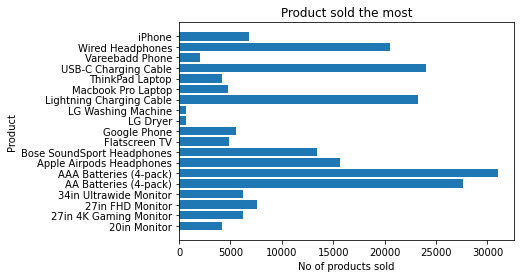

In [98]:
plt.barh(list(dct.keys()),list(dct.values()))
plt.xlabel('No of products sold')
plt.ylabel('Product')
plt.title('Product sold the most')